In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


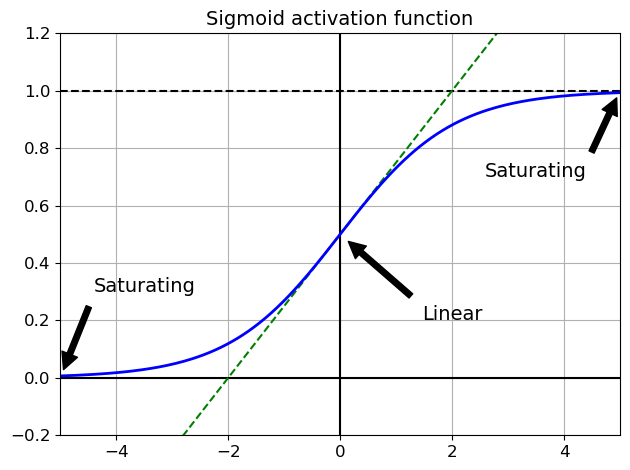

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

Saving figure leaky_relu_plot


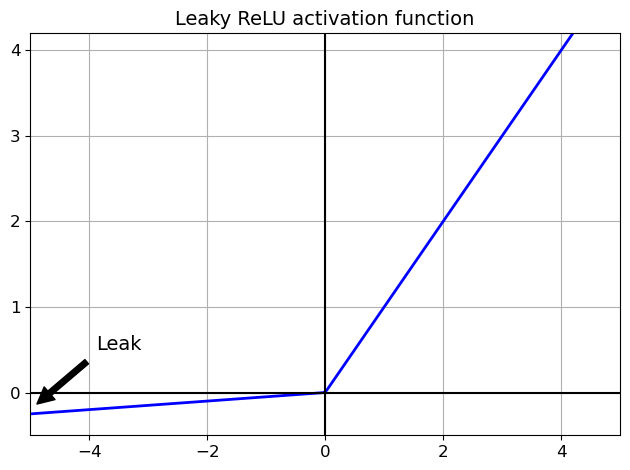

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [8]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [9]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
   1/1719 [..............................] - ETA: 4:54 - loss: 2.4525 - accuracy: 0.0625

2024-08-01 18:11:51.296304: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 2s 838us/step - loss: 1.2921 - accuracy: 0.6008 - val_loss: 0.8726 - val_accuracy: 0.7136
Epoch 2/10
1719/1719 [==============================] - 1s 790us/step - loss: 0.7847 - accuracy: 0.7439 - val_loss: 0.7042 - val_accuracy: 0.7746
Epoch 3/10
1719/1719 [==============================] - 1s 784us/step - loss: 0.6743 - accuracy: 0.7806 - val_loss: 0.6371 - val_accuracy: 0.7940
Epoch 4/10
1719/1719 [==============================] - 1s 770us/step - loss: 0.6158 - accuracy: 0.7990 - val_loss: 0.5845 - val_accuracy: 0.8128
Epoch 5/10
1719/1719 [==============================] - 1s 791us/step - loss: 0.5777 - accuracy: 0.8088 - val_loss: 0.5528 - val_accuracy: 0.8212
Epoch 6/10
1719/1719 [==============================] - 1s 770us/step - loss: 0.5507 - accuracy: 0.8152 - val_loss: 0.5301 - val_accuracy: 0.8266
Epoch 7/10
1719/1719 [==============================] - 1s 767us/step - loss: 0.5303 - accuracy: 0.8214 - val_loss: 0.5121 - val_accura

In [11]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 795us/step - loss: 1.3170 - accuracy: 0.6024 - val_loss: 0.8974 - val_accuracy: 0.7012
Epoch 2/10
1719/1719 [==============================] - 1s 757us/step - loss: 0.8074 - accuracy: 0.7362 - val_loss: 0.7188 - val_accuracy: 0.7676
Epoch 3/10
1719/1719 [==============================] - 1s 741us/step - loss: 0.6908 - accuracy: 0.7766 - val_loss: 0.6463 - val_accuracy: 0.7926
Epoch 4/10
1719/1719 [==============================] - 1s 781us/step - loss: 0.6276 - accuracy: 0.7958 - val_loss: 0.5898 - val_accuracy: 0.8100
Epoch 5/10
1719/1719 [==============================] - 1s 775us/step - loss: 0.5861 - accuracy: 0.8060 - val_loss: 0.5547 - val_accuracy: 0.8212
Epoch 6/10
1719/1719 [==============================] - 1s 739us/step - loss: 0.5562 - accuracy: 0.8136 - val_loss: 0.5291 - val_accuracy: 0.8280
Epoch 7/10
1719/1719 [==============================] - 1s 729us/step - loss: 0.5339 - accuracy: 0.8205 - val_loss: 0.5087 -

Saving figure elu_plot


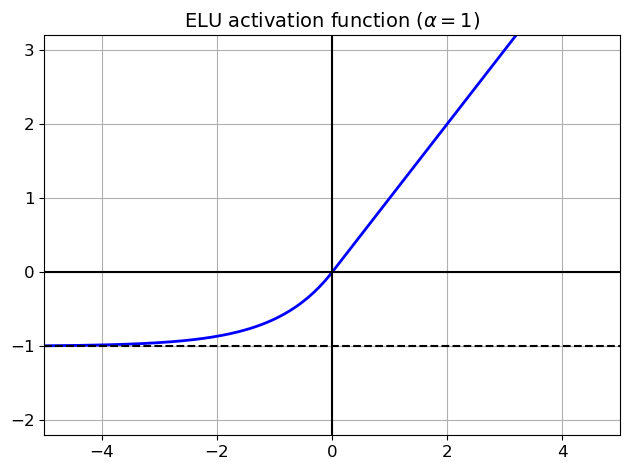

In [12]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [13]:
keras.layers.Dense(10, activation="elu")

Saving figure selu_plot


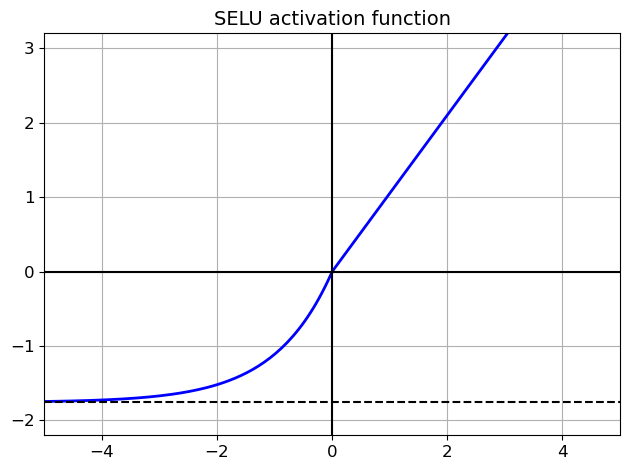

In [14]:
from scipy.special import erfc
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [15]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.82
Layer 900: mean 0.02, std deviation 0.99


In [16]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="selu" , kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu" , kernel_initializer="lecun_normal"))
    
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = keras.optimizers.legacy.SGD(learning_rate=0.001), metrics = ["accuracy"])

In [20]:
pixel_means = X_train.mean(axis = 0, keepdims=True)
pixel_stds = X_train.std(axis = 0, keepdims=True)
X_train_scaled = (X_train - pixel_means)/pixel_stds
X_valid_scaled = (X_valid - pixel_means)/pixel_stds
X_test_scaled = (X_test - pixel_means)/pixel_stds

In [21]:
history = model.fit(X_train_scaled , y_train , epochs = 5 , validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 15s 8ms/step - loss: 1.4978 - accuracy: 0.4019 - val_loss: 1.0575 - val_accuracy: 0.5704
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.9223 - accuracy: 0.6376 - val_loss: 0.7758 - val_accuracy: 0.7012
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.8271 - accuracy: 0.6853 - val_loss: 0.7207 - val_accuracy: 0.7436
Epoch 4/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6772 - accuracy: 0.7503 - val_loss: 0.5937 - val_accuracy: 0.7862
Epoch 5/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6059 - accuracy: 0.7782 - val_loss: 0.5870 - val_accuracy: 0.7906


In [22]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 1.8718 - accuracy: 0.2658 - val_loss: 1.6496 - val_accuracy: 0.2972
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 1.2019 - accuracy: 0.4790 - val_loss: 1.1795 - val_accuracy: 0.5282
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 1.0624 - accuracy: 0.5698 - val_loss: 0.9302 - val_accuracy: 0.6298
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 1.0906 - accuracy: 0.5574 - val_loss: 0.9614 - val_accuracy: 0.6468
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8878 - accuracy: 0.6375 - val_loss: 0.7659 - val_accuracy: 0.6994


In [23]:
 model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300 , activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [25]:
[(var.name , var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.8398 - accuracy: 0.7219 - val_loss: 0.5570 - val_accuracy: 0.8158
Epoch 2/10
1719/1719 [==============================] - 2s 981us/step - loss: 0.5722 - accuracy: 0.8035 - val_loss: 0.4789 - val_accuracy: 0.8368
Epoch 3/10
1719/1719 [==============================] - 2s 968us/step - loss: 0.5183 - accuracy: 0.8199 - val_loss: 0.4459 - val_accuracy: 0.8478
Epoch 4/10
1719/1719 [==============================] - 2s 974us/step - loss: 0.4805 - accuracy: 0.8339 - val_loss: 0.4231 - val_accuracy: 0.8522
Epoch 5/10
1719/1719 [==============================] - 2s 961us/step - loss: 0.4548 - accuracy: 0.8409 - val_loss: 0.4086 - val_accuracy: 0.8564
Epoch 6/10
1719/1719 [==============================] - 2s 959us/step - loss: 0.4389 - accuracy: 0.8457 - val_loss: 0.3972 - val_accuracy: 0.8592
Epoch 7/10
1719/1719 [==============================] - 2s 967us/step - loss: 0.4248 - accuracy: 0.8506 - val_loss: 0.3865 - v

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 981us/step - loss: 1.0341 - accuracy: 0.6751 - val_loss: 0.6629 - val_accuracy: 0.7870
Epoch 2/10
1719/1719 [==============================] - 2s 940us/step - loss: 0.6651 - accuracy: 0.7849 - val_loss: 0.5409 - val_accuracy: 0.8224
Epoch 3/10
1719/1719 [==============================] - 2s 937us/step - loss: 0.5815 - accuracy: 0.8088 - val_loss: 0.4861 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 2s 947us/step - loss: 0.5313 - accuracy: 0.8217 - val_loss: 0.4530 - val_accuracy: 0.8458
Epoch 5/10
1719/1719 [==============================] - 2s 941us/step - loss: 0.4993 - accuracy: 0.8297 - val_loss: 0.4317 - val_accuracy: 0.8508
Epoch 6/10
1719/1719 [==============================] - 2s 941us/step - loss: 0.4785 - accuracy: 0.8355 - val_loss: 0.4137 - val_accuracy: 0.8570
Epoch 7/10
1719/1719 [==============================] - 2s 942us/step - loss: 0.4629 - accuracy: 0.8401 - val_loss: 0.4012 -

In [30]:
optimizer = keras.optimizers.legacy.SGD(clipvalue=1.0)
model.compile(loss="mse" , optimizer= keras.optimizers.legacy.SGD(learning_rate=1e-3))

In [31]:
optimizer = keras.optimizers.legacy.SGD(clipnorm=1.0)

In [32]:
def split_dataset(X,y):
    y_5_or_6 = (y==5) | (y==6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6],y_B))

(X_train_A , y_train_A) , (X_train_B , y_train_B) = split_dataset(X_train , y_train)
(X_valid_A , y_valid_A) , (X_valid_B , y_valid_B) = split_dataset(X_valid , y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [33]:
X_train_A.shape

(43986, 28, 28)

In [34]:
X_train_B.shape

(200, 28, 28)

In [35]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [36]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [37]:
tf.random.set_seed(42)
np.random.seed(42)

In [38]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300 , 100 , 50 , 50 , 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [39]:
model_A.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.legacy.SGD(learning_rate=0.001), metrics=['accuracy'])

In [40]:
model_A.fit(X_train_A, y_train_A , epochs=20 , validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 1s 934us/step - loss: 0.6475 - accuracy: 0.8010 - val_loss: 0.4112 - val_accuracy: 0.8625
Epoch 2/20
1375/1375 [==============================] - 1s 878us/step - loss: 0.3671 - accuracy: 0.8759 - val_loss: 0.3330 - val_accuracy: 0.8857
Epoch 3/20
1375/1375 [==============================] - 1s 878us/step - loss: 0.3232 - accuracy: 0.8871 - val_loss: 0.3029 - val_accuracy: 0.8959
Epoch 4/20
1375/1375 [==============================] - 1s 878us/step - loss: 0.3010 - accuracy: 0.8957 - val_loss: 0.2868 - val_accuracy: 0.9016
Epoch 5/20
1375/1375 [==============================] - 1s 884us/step - loss: 0.2868 - accuracy: 0.9005 - val_loss: 0.2780 - val_accuracy: 0.9048
Epoch 6/20
1375/1375 [==============================] - 1s 872us/step - loss: 0.2765 - accuracy: 0.9049 - val_loss: 0.2695 - val_accuracy: 0.9073
Epoch 7/20
1375/1375 [==============================] - 1s 882us/step - loss: 0.2679 - accuracy: 0.9080 - val_loss: 0.2701 -

In [41]:
model_A.save("my_model_A.h5")
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 13ms/step - loss: 0.7255 - accuracy: 0.6750 - val_loss: 0.5741 - val_accuracy: 0.7241
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.4308 - accuracy: 0.8350 - val_loss: 0.3870 - val_accuracy: 0.8499
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.8950 - val_loss: 0.2963 - val_accuracy: 0.9047
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.2323 - accuracy: 0.9350 - val_loss: 0.2409 - val_accuracy: 0.9300
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1897 - accuracy: 0.9550 - val_loss: 0.2024 - val_accuracy: 0.9503
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1589 - accuracy: 0.9700 - val_loss: 0.1792 - val_accuracy: 0.9564
Epoch 7/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1390 - accuracy: 0.9750 - val_loss: 0.1653 - val_accuracy: 0.9594
Epoch 8/20
7/7 [=================

In [42]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [43]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [44]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [45]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 12ms/step - loss: 2.0168 - accuracy: 0.4400 - val_loss: 1.9006 - val_accuracy: 0.4381
Epoch 2/4
7/7 [==============================] - 0s 5ms/step - loss: 1.8168 - accuracy: 0.4600 - val_loss: 1.7222 - val_accuracy: 0.4544
Epoch 3/4
7/7 [==============================] - 0s 5ms/step - loss: 1.6368 - accuracy: 0.4650 - val_loss: 1.5518 - val_accuracy: 0.4696
Epoch 4/4
7/7 [==============================] - 0s 5ms/step - loss: 1.4653 - accuracy: 0.4650 - val_loss: 1.3860 - val_accuracy: 0.4726
Epoch 1/16
7/7 [==============================] - 0s 13ms/step - loss: 0.8494 - accuracy: 0.5750 - val_loss: 0.4211 - val_accuracy: 0.8611
Epoch 2/16
7/7 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8900 - val_loss: 0.2970 - val_accuracy: 0.9229
Epoch 3/16
7/7 [==============================] - 0s 5ms/step - loss: 0.2515 - accuracy: 0.9350 - val_loss: 0.2347 - val_accuracy: 0.9493
Epoch 4/16
7/7 [====================

In [46]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 577us/step - loss: 0.0729 - accuracy: 0.9885


[0.07286336272954941, 0.9884999990463257]

In [47]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 538us/step - loss: 0.0815 - accuracy: 0.9825


[0.08145827800035477, 0.9825000166893005]

In [48]:
(100 - 97.05) / (100 - 99.25)

3.933333333333337